### 3.4.1 学習コードの実装

In [1]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_cbow.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any, Any}("say" => 2, "goodbye" => 3, "you" => 1, "hello" => 6, "." => 7, "and" => 4, "i" => 5), Dict{Any, Any}(5 => "i", 4 => "and", 6 => "hello", 7 => ".", 2 => "say", 3 => "goodbye", 1 => "you"))

In [4]:
vocab_size = length(word_to_id)
contexts, target = create_contexts_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32, 3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [5]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleCBOW(MatMul([[0.01665265108173054 -0.006037606184697559 … -0.021902312082829164 0.0016284657371056696; 0.0007569558508837235 0.005897705764535017 … 0.013494332613271631 -0.0032986353771645065; … ; -0.0019031379003138906 -0.010402254858766606 … -0.02408372147642377 -0.0029885644205830298; -0.003244508342821373 -0.014524723111973116 … -0.011532007630941208 -0.008532991178359548]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[0.01665265108173054 -0.006037606184697559 … -0.021902312082829164 0.0016284657371056696; 0.0007569558508837235 0.005897705764535017 … 0.013494332613271631 -0.0032986353771645065; … ; -0.0019031379003138906 -0.010402254858766606 … -0.02408372147642377 -0.0029885644205830298; -0.003244508342821373 -0.014524723111973116 … -0.011532007630941208 -0.008532991178359548]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[0.02620341423081391 -0.008963435

In [6]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

| epoch 0 | iter 1 / 2 | loss 5.84
| epoch 0 | iter 2 / 2 | loss 5.84
| epoch 10 | iter 2 / 2 | loss 5.84
| epoch 20 | iter 1 / 2 | loss 5.83
| epoch 20 | iter 2 / 2 | loss 5.83
| epoch 30 | iter 2 / 2 | loss 5.82
| epoch 40 | iter 1 / 2 | loss 5.79
| epoch 40 | iter 2 / 2 | loss 5.78
| epoch 50 | iter 2 / 2 | loss 5.75
| epoch 60 | iter 1 / 2 | loss 5.69
| epoch 60 | iter 2 / 2 | loss 5.64
| epoch 70 | iter 2 / 2 | loss 5.63
| epoch 80 | iter 1 / 2 | loss 5.52
| epoch 80 | iter 2 / 2 | loss 5.39
| epoch 90 | iter 2 / 2 | loss 5.45
| epoch 100 | iter 1 / 2 | loss 5.34
| epoch 100 | iter 2 / 2 | loss 5.16
| epoch 110 | iter 2 / 2 | loss 5.26
| epoch 120 | iter 1 / 2 | loss 5.13
| epoch 120 | iter 2 / 2 | loss 5.2
| epoch 130 | iter 2 / 2 | loss 4.97
| epoch 140 | iter 1 / 2 | loss 4.81
| epoch 140 | iter 2 / 2 | loss 4.72
| epoch 150 | iter 2 / 2 | loss 4.77
| epoch 160 | iter 1 / 2 | loss 4.56
| epoch 160 | iter 2 / 2 | loss 4.43
| epoch 170 | iter 2 / 2 | loss 4.44
| epoch 180 | iter 

In [7]:
using Plots
gr()

Plots.GRBackend()

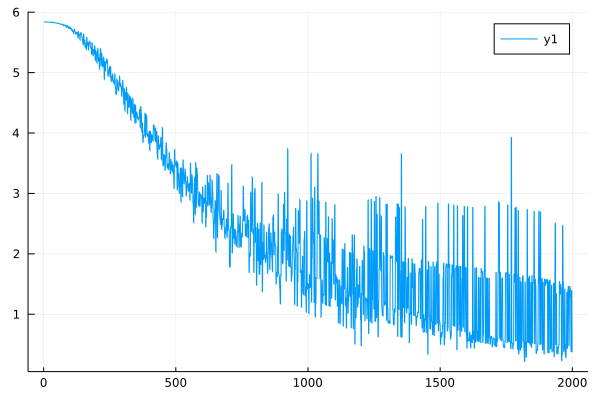

In [8]:
plot(trainer.loss_list)

#### MatMulレイヤの重みを表示

In [9]:
for (word_id, word) = id_to_word
    println("$(word) $(model.word_vecs[word_id, :])")
end

i [0.010431898539772904, -0.0007747407655072461, -0.010024643881186525, 0.019226214139379378, 0.004746337019157319]
and [0.00418497356905653, -0.006003378664927163, 0.008036647628334326, -0.013176445858067258, 0.004402546497145276]
hello [-0.0019031379003138906, -0.010402254858766606, 0.005366817361040867, -0.02408372147642377, -0.0029885644205830298]
. [-0.003244508342821373, -0.014524723111973116, 0.003436252291153356, -0.011532007630941208, -0.008532991178359548]
say [0.0007569558508837235, 0.005897705764535017, 0.006935872981876444, 0.013494332613271631, -0.0032986353771645065]
goodbye [-0.0008813628607480152, 0.0098755000783067, 0.0054821729575681875, -0.0078077975193792115, -0.013212324517017955]
you [0.01665265108173054, -0.006037606184697559, 0.021667197780989432, -0.021902312082829164, 0.0016284657371056696]
